# Unterabtastung bei einem EKG-Signal

**Oben:** EKG-Signal, mit leichter Grundlinienschwankung und Netzbrumm bei 50 Hz und Oberwellen, im Frequenz- und Zeitbereich. fs=1000 Hz

**Unten:**: Das gleiche Signal, nun abgetastet mit der eingestellten Abtastrate, in Frequenz- und Zeitbereich

*Tipp: Die Graphen sind recht schmal voreingestellt, um auf kleinen Tablets sichtbar zu sein. Verwenden Sie das graue Dreieck, um sie zu vergrößern*


Output()

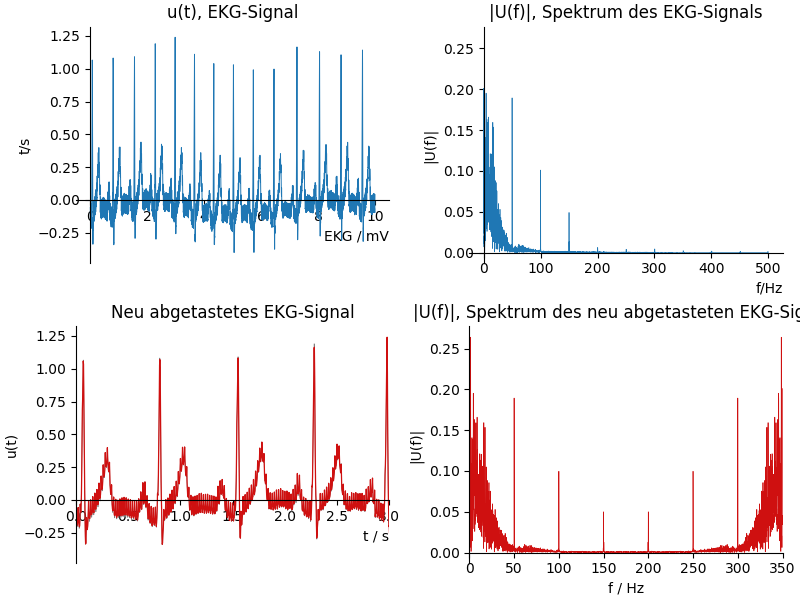

In [6]:
# (c) Benno Dömer, HS Pforzheim 2022
import platform
if platform.system() == "Emscripten": # running in JupyterLite
    %pip install -r runtime-requirements.txt

%matplotlib widget 

import numpy as np
from numpy import (pi, sqrt, sin, cos, fft, arange, zeros, ones, sinc) 
import matplotlib.pyplot as plt
from scipy import signal
import ipywidgets as widgets # interaktive Controls wie Slider, Dropdowns etc.

def myplotstyle(ax): # Hilfsfunktion, hübscht den Plot etwas auf
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))
    
figs, axs = plt.subplots(2,2,figsize=(8, 6), dpi=100, layout='constrained',num='Signal')
    
#ecg_raw  = np.loadtxt('ecg.csv') # EKG-Rohdaten, fs = 256, Länge 20 s
ecg_raw  = np.loadtxt('ecg_1000Hz.csv') # EKG-Rohdaten, fs = 1000, Länge 12 s

fs = 1000 # 256 für ecg.csv
ta=1/fs

ts = 1/fs*arange(0,len(ecg_raw))
plnoise = 0.05*cos(2*pi*50*ts)+0.025*cos(2*pi*100*ts)+0.0125*cos(2*pi*150*ts)
ecg_raw = ecg_raw + plnoise # 50Hz-Brumm

fsig=arange(0,4*fs)*1/8
Hs = np.fft.fft(ecg_raw[fs:9*fs])
Hs = abs(Hs*ta)
#Signal plotten im Zeitbereich
axc = axs[0][0]
axc.cla()
axc.plot(ts,ecg_raw,linewidth=.7)
axc.set_title('u(t), EKG-Signal')
axc.set_xlabel('EKG / mV',loc='right')
axc.set_ylabel('t/s')
myplotstyle(axc)

#Signal plotten im Frequenzbereich
axc = axs[0][1]
axc.cla()
axc.plot(fsig,Hs[0:4*fs],linewidth=.5)
axc.set_title('|U(f)|, Spektrum des EKG-Signals')
axc.set_ylabel('|U(f)|')
axc.set_xlabel('f/Hz',loc='right')
myplotstyle(axc)

#figs.canvas.draw()

#figf, axf = plt.subplots(2,1,figsize=(7, 5), dpi=100, layout='constrained',num='Nach Abtastung mit neuer fs')

def plotdata(fsn, z): # wird bei Interaktion aufgerufen
    
    ts = 1/fs*arange(0,len(ecg_raw))
    t=arange(0,10-1/fsn,1/fsn)
    ecg = np.interp(t,ts,ecg_raw)
    
    #Signal filtern und darstellen
    #ecg_fil=signal.lfilter(b,a,ecg_raw)
    ax=axs[1][0]
    ax.cla()
    ax.plot(ts,ecg_raw,color='.5',linewidth=.5)
    ax.plot(t,ecg,color='#CF1010',linewidth=.9)
    ax.set_title('Neu abgetastetes EKG-Signal')
    ax.set_xlabel('t / s',loc='right')
    ax.set_ylabel('u(t)')
    if z:
        ax.set_xlim(0,3)
    myplotstyle(ax)
    
    #Signalspektrum berechnen und darstellen
    Hr = np.fft.fft(ecg[fsn:9*fsn])
    Hr = abs(Hr/fsn)
    fsign=arange(0,8*fsn)*1/8 # 8 s Snipplet
    ax=axs[1][1]
    ax.cla()
    #ax.plot(fsig,Hs[0:4*fs],color='#808080',linewidth=.5)
    ax.plot(fsign,Hr[0:8*fsn],color='#CF1010',linewidth=.5)
    ax.set_title('|U(f)|, Spektrum des neu abgetasteten EKG-Signals')
    ax.set_xlabel('f / Hz')
    ax.set_ylabel('|U(f)|')
    ax.set_xlim(0,fsn)
    myplotstyle(ax)
    
    figs.canvas.draw()
    
# Interaktion: 
# Definition von Controls: 
#typecombo = widgets.Dropdown(options=[('EKG','ecg'),('Sinus','sin')],value='ecg',description='Signal')
#fslider  = widgets.IntSlider(min=5, max=100, step=5, value=10, continuous_update=True, description='f vom Sinus / Hz')
fsslider  = widgets.IntSlider(min=8, max=350, step=1, value=350, continuous_update=True, description='$f_s$ / Hz')
zoomcb  = widgets.Checkbox(value=True, description='Zoom')

# Arrangieren in horizontaler Box:
#ui1 = widgets.HBox([typecombo, fslider, fsslider, zoomcb])
ui1 = widgets.HBox([fsslider, zoomcb])
ui1.layout = widgets.Layout( border='solid 2px red')
# Verknüpfen mit Callback
#out = widgets.interactive_output(plotdata, { 'ftype': typecombo,'f': fslider, 'fsn':fsslider,'z':zoomcb}) 
out = widgets.interactive_output(plotdata, { 'fsn':fsslider,'z':zoomcb}) 
#Anzeigen
display(ui1,out)
plt.figure(figs)
plt.show()

**Signalquelle:** *Physionet*, 
Referenz: Goldberger, A., Amaral, L., Glass, L., Hausdorff,  J., Ivanov, P. C., Mark, R., ... & Stanley, H. E. (2000).  PhysioBank, PhysioToolkit, and PhysioNet: Components of a new research  resource for complex physiologic signals. Circulation [Online]. 101  (23), pp. e215–e220.  
<!--https://physionet.org/content/ptbdb/1.0.0/ Record 5 (256 Hz)-->
https://physionet.org/content/autonomic-aging-cardiovascular/1.0.0/ Record 10 (1000 Hz)
